# Lecture 5: Neural Network Learning Part 3

## Using Keras Library

3/16/2023

#### Import Libraries:

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import matplotlib.pyplot as plt

#### Define Functions For Plotting:

In [3]:
# plot data points
def plot_fun(features, labels, classes, plotRange):
    plt.plot(features[labels[:] == classes[0], 0], features[labels[:] == classes[0], 1], 'rs',
             features[labels[:] == classes[1], 0], features[labels[:] == classes[1], 1], 'g^')
    plt.axis(plotRange)
    plt.title('Raw Data Plot For Both Classes')
    plt.xlabel('X_1: Feature 1')
    plt.ylabel('X_2: Feature 2')
    plt.legend(['Class ' + str(classes[0]), 'Class ' + str(classes[1])])
    plt.show()

# plot separating line: w1x1 + w2x2 + w0 = 0
def plot_fun_thr(features, labels, thresholdParams, learnRate, batchSize, classes):
    # plot data points
    plt.plot(features[labels[:] == classes[0], 0], features[labels[:] == classes[0], 1], 'rs',
             features[labels[:] == classes[1], 0], features[labels[:] == classes[1], 1], 'g^')
    plt.axis([-3, 3, -2, 4])
    # plot separating line
    x1 = np.linspace(-3, 3, 50)
    # w1x1 + w2x2 + w0 = 0 => x2 = -(w1x1 + w0) / w2
    x2 = -(thresholdParams[0] * x1 + thresholdParams[2]) / thresholdParams[1]
    plt.plot(x1, x2, '-b')
    plt.title(f'Data Classification:\nLearn Rate = {learnRate}, Batch Size = {batchSize}')
    plt.xlabel('X_1: Feature 1')
    plt.ylabel('X_2: Feature 2')
    plt.legend(['Class ' + str(classes[0]), 'Class ' + str(classes[1])])
    #plt.pause(0.5)
    #plt.show()

# plot training accuracy and loss
def plotCurve(trainingAccuracy, trainingLoss):
    epochs = np.arange(trainingLoss.shape[0])
    #print(epochs)
    plt.figure(figsize = [12, 6])
    plt.subplot(1, 2, 1)
    plt.plot(epochs, trainingAccuracy)
    #plt.axis([-1, 2, -1, 2])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs, trainingLoss)
    plt.xlabel('Epoch')
    plt.ylabel('Binary CrossEntropy Loss')
    plt.title('Training Loss')
    plt.show()

#### Custom Classifier Line Equation Function:

##### $$ w_1x_1 + w_2x_2 + w0 = 0 $$
##### $$ \mathrm{where} \ \ x_1 = x \ \ \mathrm{and} \ \ x_2 = y $$
##### $$ \therefore \ \ y = -\frac{w_1x + w_0}{w_2} = -\frac{w_1}{w_2}x - \frac{w_0}{w_2}$$

In [4]:
def lineEquation(lineNum, threshParams):
    w1_w2 = threshParams[0] / threshParams[1]
    #print(f'w1_w2 = {w1_w2}')
    w0_w2 = threshParams[2] / threshParams[1]
    #print(f'w0_w2 = {w0_w2}')
    if(w1_w2 >= 0):
        if(w0_w2 >= 0):
            print(f'Equation for Line {lineNum}: y = -{w1_w2:.3f}x - {w0_w2:.3f}\n')
        else: # if w0_w2 < 0
            print(f'Equation for Line {lineNum}: y = -{w1_w2:.3f}x + {abs(w0_w2):.3f}\n')
    else: # if w1_w2 < 0
        if(w0_w2 >= 0):
            print(f'Equation for Line {lineNum}: y = {abs(w1_w2):.3f}x - {w0_w2:.3f}\n')
        else: # if w0_w2 < 0
            print(f'Equation for Line {lineNum}: y = {abs(w1_w2):.3f}x + {abs(w0_w2):.3f}\n')

## Example 1: Single Layer Neural Network

#### Define The Model:

##### Activation Function: Sigmoid

##### $$ \varphi(v) = \frac{1}{1 + e^{-x}} $$

In [6]:
model1 = Sequential()
model1.add(Dense(input_dim = 2, units = 1, activation = 'sigmoid')) # 2 inputs not including bias (bias added automatically)
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


#### Compile The Model:

Define optimizer and loss functions

Example: Binary Cross Entropy / Log Loss:
##### $$ H_p(q) = -\frac{1}{N} \sum_{i=1}^{N} y_i \cdot \mathrm{log}_{10}(p(y_i)) + (1-y_i) \cdot \mathrm{log}_{10}(1-p(y_i)) $$

Other Alternatives Found Here: [Optimizers](https://keras.io/api/optimizers/) and [Losses](https://keras.io/api/losses/)

In [7]:
lRate = 0.9
opt = tf.keras.optimizers.SGD(learning_rate = lRate) # SGD: Stochastic Gradient Descent
#loss = tf.keras.losses.BinaryCrossentropy()

model1.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])

#### Define Training Data Sets:
Features, Labels and Classes

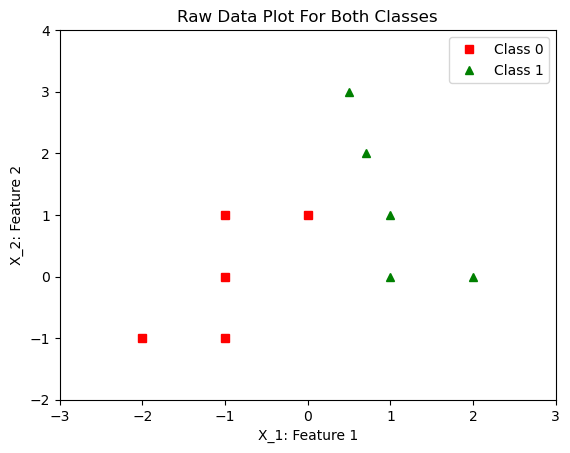

In [8]:
features = np.array([[1, 1], [1, 0], [0, 1], [-1, -1], [0.5, 3], [0.7, 2], [-1, 0], [-1, 1], [2, 0], [-2, -1]])
labels = np.array([1, 1, 0, 0, 1, 1, 0, 0, 1, 0])
classes = [0, 1]

pltRange1 = [-3, 3, -2, 4] # [x_min, x_max, y_min, y_max]
plot_fun(features, labels, classes, pltRange1)
plt.show()

#### Fit The Model:

Find Optimal Network Parameters:
 - Batch Size
 - Number of Epochs
 - Validation Split

In [9]:
numEpochs = 50
sizeBatch = 4
history = model1.fit(features, labels, batch_size = sizeBatch, epochs = numEpochs, verbose = 1)

Epoch 1/50
3/3 [==============================] - 0s 3ms/step - loss: 0.7464 - accuracy: 0.4000
Epoch 2/50
3/3 [==============================] - 0s 2ms/step - loss: 0.3369 - accuracy: 0.9000
Epoch 3/50
3/3 [==============================] - 0s 2ms/step - loss: 0.2504 - accuracy: 0.9000
Epoch 4/50
3/3 [==============================] - 0s 2ms/step - loss: 0.2118 - accuracy: 0.9000
Epoch 5/50
3/3 [==============================] - 0s 2ms/step - loss: 0.1779 - accuracy: 0.9000
Epoch 6/50
3/3 [==============================] - 0s 2ms/step - loss: 0.1550 - accuracy: 0.9000
Epoch 7/50
3/3 [==============================] - 0s 2ms/step - loss: 0.1421 - accuracy: 0.9000
Epoch 8/50
3/3 [==============================] - 0s 2ms/step - loss: 0.1306 - accuracy: 0.9000
Epoch 9/50
3/3 [==============================] - 0s 2ms/step - loss: 0.1213 - accuracy: 1.0000
Epoch 10/50
3/3 [==============================] - 0s 2ms/step - loss: 0.1155 - accuracy: 1.0000
Epoch 11/50
3/3 [======================

#### Plot Training Accuracy And Loss Using History:

Training Accuracy After 50 Epochs = 100.0 %

Training Loss After 50 Epochs = 0.044135984033346176



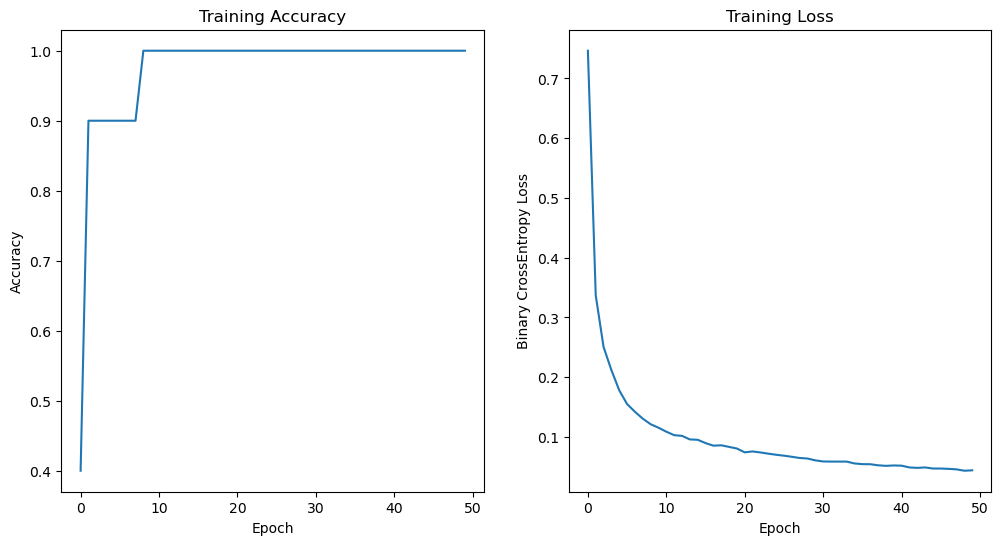

In [10]:
accuracyCurve = np.array(history.history['accuracy'])
#print(accuracyCurve, '\n')
lossCurve = np.array(history.history['loss'])
#print(lossCurve, '\n')

print(f'Training Accuracy After {numEpochs} Epochs = {accuracyCurve[numEpochs - 1] * 100} %\n')
print(f'Training Loss After {numEpochs} Epochs = {lossCurve[numEpochs - 1]}\n')
plotCurve(accuracyCurve, lossCurve)

#### Retrieve The Model Weights After Training & Plot Classifier Line:

Threshold Parameters w1, w2, w0: [ 5.0334315   0.83694524 -2.1118274 ]

Equation for Line 1: y = -6.014x + 2.523

Classification Line After 50 Epochs:



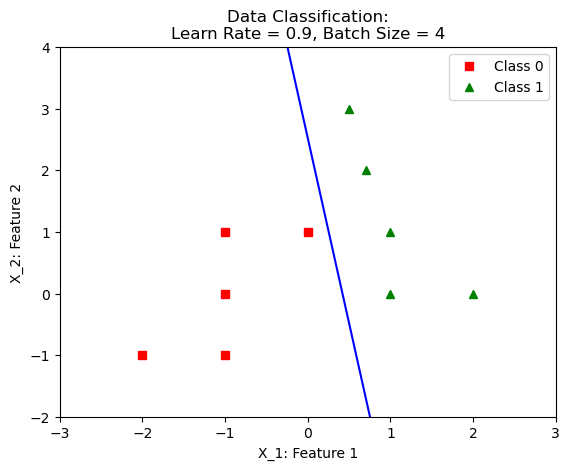

In [11]:
weights = model1.layers[0].get_weights()
#print(weights, '\n')
thresholdParams = np.array(weights[0]) # Weights w1 & w2
#print(thresholdParams, '\n')
thresholdParams = np.append(thresholdParams, weights[1]) # weights w0 for bias
#print(thresholdParams, '\n')


print(f'Threshold Parameters w1, w2, w0: {thresholdParams}\n')
lineEquation(1, thresholdParams)
print(f'Classification Line After {numEpochs} Epochs:\n')
plot_fun_thr(features, labels, thresholdParams, lRate, sizeBatch, classes)

#### Evaluate and Predict:

The trained model can be evaluated on a test set in 2 ways:
 - Evaluate the model on a held-out sample
 - Predict the class of a new sample

##### Evaluate the model on a known classification (held-out) sample:

In [12]:
test_samples1 = np.array([[0, 0], [2, 2]])
test_classes = np.array([0, 1])
score = model1.evaluate(test_samples1, test_classes)
print('\nTotal Loss on Testing Set: ', score[0])
print('Accuracy of Testing Set: ', score[1])

1/1 [==============================] - 0s 85ms/step - loss: 0.0572 - accuracy: 1.0000

Total Loss on Testing Set:  0.057150885462760925
Accuracy of Testing Set:  1.0


##### Predict the classes of New Samples:

In [13]:
test_samples2 = np.array([[0, -2], [2, 5]])
test_class1_prob = model1.predict(test_samples2)

print('\nThe Probability of Class 1 for the Test Samples is: \n', test_class1_prob, '\n')

test_lab = np.uint8(test_class1_prob > 0.5)
print('The Classes for the Test Samples is: \n', test_lab)

1/1 [==============================] - 0s 41ms/step

The Probability of Class 1 for the Test Samples is: 
 [[0.02218904]
 [0.99999464]] 

The Classes for the Test Samples is: 
 [[0]
 [1]]


## Example 2: 2 Layer Neural Network

#### Define The Model:

##### Hidden Layer Activation Function: Hyperbolic Tangent

##### $$ \varphi(v) = \mathrm{tanh}(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

##### Output Layer Activation Function: Sigmoid

##### $$ \varphi(v) = \frac{1}{1 + e^{-x}} $$

In [14]:
model2 = Sequential()
model2.add(Dense(input_dim = 2, units = 2, activation = 'tanh')) # Hidden Layer w/ 2 Neurons
model2.add(Dense(units = 1, activation = 'sigmoid')) # Output Layer
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


#### Define Training Data Sets:
Features, Labels and Classes

Data Plot Before Normalization:



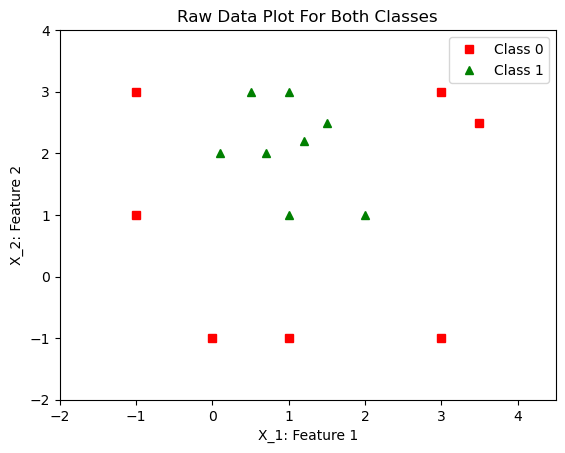

In [15]:
features2 = np.array([[1, 1], [1, -1], [0, -1], [0.5, 3], [0.7, 2], [-1, 3], [-1, 1], [3, -1],
                      [1, 5], [3.5, 2.5], [3, 3], [1.5, 2.5], [1, 3], [2, 1], [0.1, 2], [1.2, 2.2]])
labels2 = np.array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype = np.uint8)
classes2 = [0, 1]

pltRange2 = [-2, 4.5, -2, 4] # [x_min, x_max, y_min, y_max]
print('Data Plot Before Normalization:\n')
plot_fun(features2, labels2, classes2, pltRange2)

#### Normalize Data To Reduce Model Skew:

##### $$ x_{norm} = \frac{x - \mathrm{\mu}}{\sigma} $$

Data Plot After Normalization:



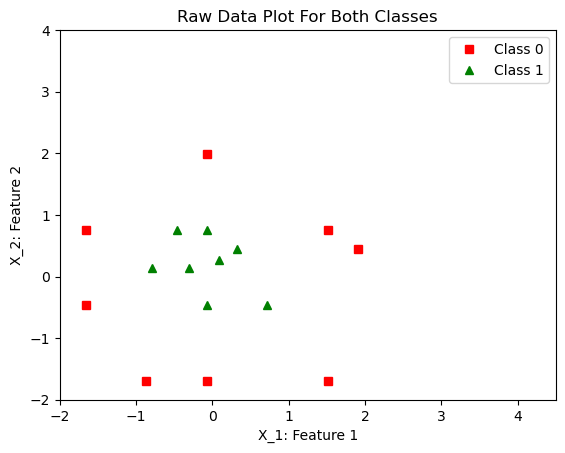

In [16]:
featuresNorm = (features2 - np.mean(features2, axis = 0)) / np.std(features2, axis = 0)

print('Data Plot After Normalization:\n')
plot_fun(featuresNorm, labels2, classes2, pltRange2)

#### Compile The Model:

In [17]:
lRate2 = 0.9
opt2 = tf.keras.optimizers.SGD(learning_rate = lRate2) # SGD: Stochastic Gradient Descent
model2.compile(loss = 'binary_crossentropy', optimizer = opt2, metrics = ['accuracy'])

#### Fit The Model:

Find Optimal Network Parameters:
 - Batch Size
 - Number of Epochs
 - Validation Split

In [18]:
numEpochs2 = 200
sizeBatch2 = 16
history2 = model2.fit(featuresNorm, labels2, batch_size = sizeBatch2, epochs = numEpochs2, verbose = 1)

Epoch 1/200
1/1 [==============================] - 0s 214ms/step - loss: 0.7561 - accuracy: 0.4375
Epoch 2/200
1/1 [==============================] - 0s 4ms/step - loss: 0.7292 - accuracy: 0.4375
Epoch 3/200
1/1 [==============================] - 0s 3ms/step - loss: 0.7128 - accuracy: 0.4375
Epoch 4/200
1/1 [==============================] - 0s 4ms/step - loss: 0.7021 - accuracy: 0.4375
Epoch 5/200
1/1 [==============================] - 0s 4ms/step - loss: 0.6946 - accuracy: 0.5000
Epoch 6/200
1/1 [==============================] - 0s 4ms/step - loss: 0.6889 - accuracy: 0.6250
Epoch 7/200
1/1 [==============================] - 0s 3ms/step - loss: 0.6839 - accuracy: 0.7500
Epoch 8/200
1/1 [==============================] - 0s 3ms/step - loss: 0.6792 - accuracy: 0.7500
Epoch 9/200
1/1 [==============================] - 0s 3ms/step - loss: 0.6743 - accuracy: 0.7500
Epoch 10/200
1/1 [==============================] - 0s 3ms/step - loss: 0.6691 - accuracy: 0.7500
Epoch 11/200
1/1 [=========

#### Plot Training Accuracy And Loss Using History:

Training Accuracy After 200 Epochs = 100.0 %

Training Loss After 200 Epochs = 0.049909912049770355



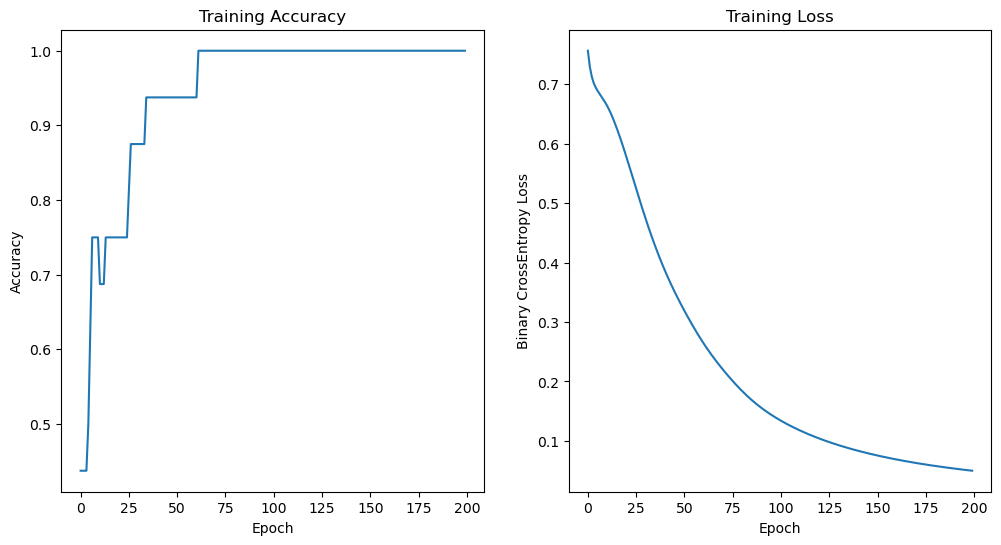

In [19]:
accuracyCurve2 = np.array(history2.history['accuracy'])
#print(accuracyCurve, '\n')
lossCurve2 = np.array(history2.history['loss'])
#print(lossCurve, '\n')

print(f'Training Accuracy After {numEpochs2} Epochs = {accuracyCurve2[numEpochs2 - 1] * 100} %\n')
print(f'Training Loss After {numEpochs2} Epochs = {lossCurve2[numEpochs2 - 1]}\n')
plotCurve(accuracyCurve2, lossCurve2)

#### Retrieve The Model Weights After Training & Plot Classifier Lines:

Line 1 Weights: [-3.8088224 -1.6457877  2.3127468]

Equation for Line 1: y = -2.314x + 1.405

Line 2 Weights: [-2.7178674 -1.8593591 -2.220612 ]

Equation for Line 2: y = -1.462x - 1.194



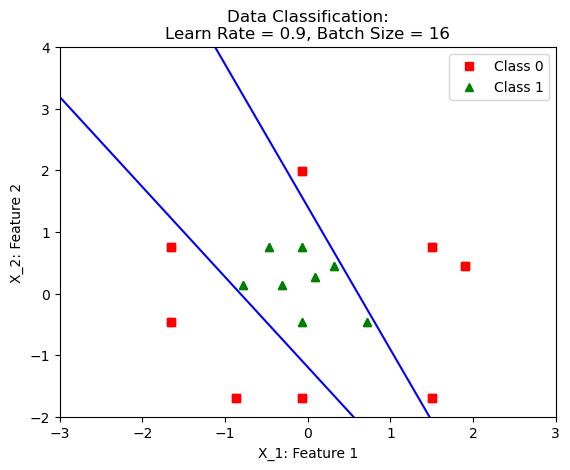

In [20]:
weights2 = model2.layers[0].get_weights()
#print(weights2, '\n')

plt.figure()
for node in range(weights2[0].shape[1]):
    thresholdParams2 = np.array(weights2[0][:, node]) # Input Weights w1 & w2
    thresholdParams2 = np.append(thresholdParams2, weights2[1][node]) # Append Bias Weight w0
    print(f'Line {node + 1} Weights: {thresholdParams2}\n')
    lineEquation(node + 1, thresholdParams2)
    plot_fun_thr(featuresNorm, labels2, thresholdParams2, lRate2, sizeBatch2, classes2)
plt.show()